<a href="https://colab.research.google.com/github/harshildarji/ML-Practise/blob/master/TF%202%20Tutorials/text_classification_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Text classification with an RNN](https://www.tensorflow.org/beta/tutorials/text/text_classification_rnn)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

TensorFlow 2.x selected.


In [2]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Just a small helper function to plot graphs.

In [0]:
def plot(history, string):
    plt.plot(history.history[string], label='Training '+string)
    plt.plot(history.history['val_'+string], label='Validation '+string)
    plt.xlabel('Epochs')
    plt.ylabel(string.title())
    plt.legend();

#### Load and prepare the dataset

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

In [0]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
tokenizer = info.features['text'].encoder

In [8]:
print('Vocab size: {}'.format(tokenizer.vocab_size))

Vocab size: 8185


An example!

In [0]:
sample_string = 'Hello World'

In [10]:
tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string: {}'.format(tokenized_string))

Tokenized string: [4025, 222, 2307, 1829]


In [11]:
original_string = tokenizer.decode(tokenized_string)
print('Original string: {}'.format(original_string))

Original string: Hello World


This tokenizer encodes the string by breaking it into subwords if the word is not in its dictionary.

In [12]:
for ts in tokenized_string:
    print('{}\t-->\t{}'.format(ts, tokenizer.decode([ts])))

4025	-->	Hell
222	-->	o 
2307	-->	Wor
1829	-->	ld


Back to dataset preparation!

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

In [0]:
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

#### Define the model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [19]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 182s 465ms/step - loss: 0.5408 - accuracy: 0.7284 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 176s 449ms/step - loss: 0.3825 - accuracy: 0.8454 - val_loss: 0.4324 - val_accuracy: 0.8204
Epoch 3/10
391/391 [==============================] - 173s 443ms/step - loss: 0.4309 - accuracy: 0.8188 - val_loss: 0.7105 - val_accuracy: 0.7592
Epoch 4/10
391/391 [==============================] - 173s 441ms/step - loss: 0.3809 - accuracy: 0.8384 - val_loss: 0.5806 - val_accuracy: 0.7278
Epoch 5/10
391/391 [==============================] - 172s 440ms/step - loss: 0.4397 - accuracy: 0.8091 - val_loss: 0.5589 - val_accuracy: 0.7636
Epoch 6/10
391/391 [==============================] - 172s 440ms/step - loss: 0.3294 - accuracy: 0.8648 - val_loss: 0.4506 - val_accuracy: 0.8133
Epoch 7/10
391/391 [==============================] - 173s 442ms/step - loss: 0.2697 - accuracy: 0.8968 - val_loss: 

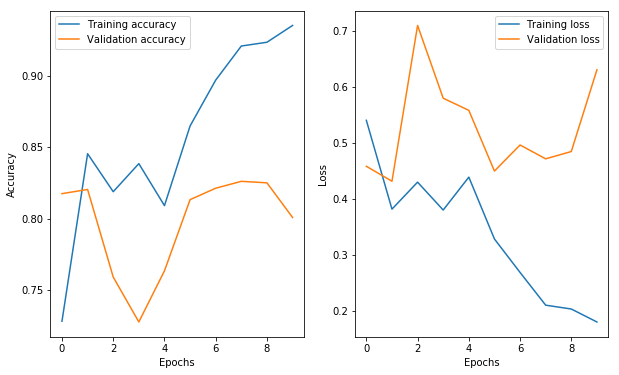

In [20]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plot(history, 'accuracy')

plt.subplot(1, 2, 2)
plot(history, 'loss')

#### Add two or more LSTM layers

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 331s 846ms/step - loss: 0.5375 - accuracy: 0.7196 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 323s 826ms/step - loss: 0.4150 - accuracy: 0.8165 - val_loss: 0.7056 - val_accuracy: 0.6320
Epoch 3/10
391/391 [==============================] - 321s 820ms/step - loss: 0.4506 - accuracy: 0.7901 - val_loss: 0.4564 - val_accuracy: 0.8077
Epoch 4/10
391/391 [==============================] - 320s 818ms/step - loss: 0.3393 - accuracy: 0.8621 - val_loss: 0.3996 - val_accuracy: 0.8254
Epoch 5/10
391/391 [==============================] - 321s 821ms/step - loss: 0.2760 - accuracy: 0.8906 - val_loss: 0.3515 - val_accuracy: 0.8568
Epoch 6/10
391/391 [==============================] - 319s 817ms/step - loss: 0.2126 - accuracy: 0.9212 - val_loss: 0.3306 - val_accuracy: 0.8677
Epoch 7/10
391/391 [==============================] - 320s 818ms/step - loss: 0.1624 - accuracy: 0.9436 - val_loss: 

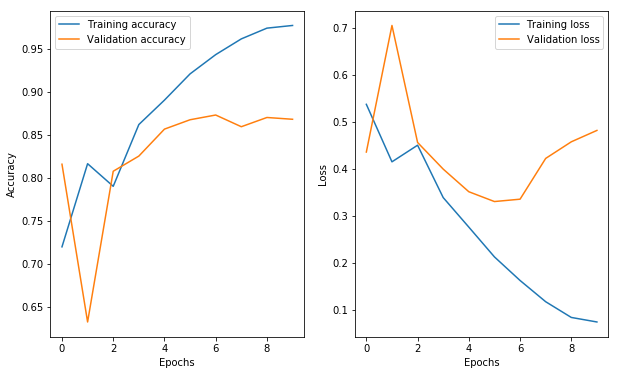

In [25]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plot(history, 'accuracy')

plt.subplot(1, 2, 2)
plot(history, 'loss')